In [21]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

%matplotlib inline

In [2]:
# Load data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
print(X_train_full.shape)
print(y_train_full.shape)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

(60000, 28, 28)
(60000,)


In [18]:
print(f"Target_distribution_train = {Counter(y_train_full)}")
print(f"Target_distribution_test = {Counter(y_test)}")

Target_distribution_train = Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})
Target_distribution_test = Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})


Ankle boot


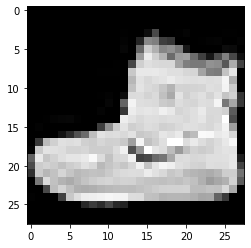

T-shirt/top


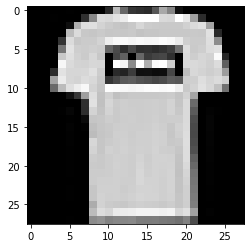

T-shirt/top


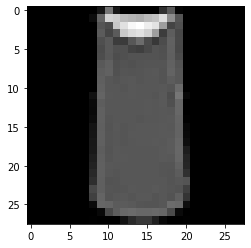

Dress


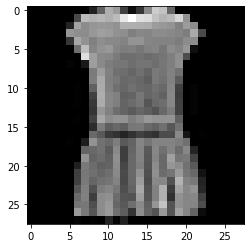

T-shirt/top


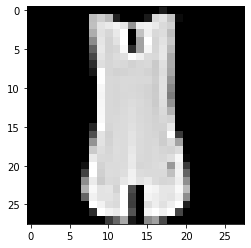

In [13]:
# View sample images
samples = X_train_full[:5] # First 5 samples
targets = [class_names[i] for i in y_train_full[:5]]
for img, target in zip(samples, targets):
    print(target)
    plt.imshow(img, cmap="gray")
    plt.show()
    print("="*50)

In [30]:
# Split into training and validation sample and normalize
split = 0.8 # 80% train
train_size = int(0.8*X_train_full.shape[0])
X_train, X_val = X_train_full[:train_size]/255.0, X_train_full[train_size:]/255.0
X_test = X_test/255.0
y_train, y_val = y_train_full[:train_size], y_train_full[train_size:]

In [23]:
#Init model
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# compile model - Naive
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [27]:
h = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7481 - accuracy: 0.7524 - val_loss: 0.5494 - val_accuracy: 0.8139
Epoch 2/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5033 - accuracy: 0.8260 - val_loss: 0.4774 - val_accuracy: 0.8320
Epoch 3/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4561 - accuracy: 0.8413 - val_loss: 0.4635 - val_accuracy: 0.8341
Epoch 4/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4286 - accuracy: 0.8505 - val_loss: 0.4177 - val_accuracy: 0.8533
Epoch 5/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4062 - accuracy: 0.8578 - val_loss: 0.4211 - val_accuracy: 0.8548
Epoch 6/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3903 - accuracy: 0.8633 - val_loss: 0.3959 - val_accuracy: 0.8583
Epoch 7/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3745 - accuracy: 0.8676 - val_loss: 0.3848 - val_accuracy:

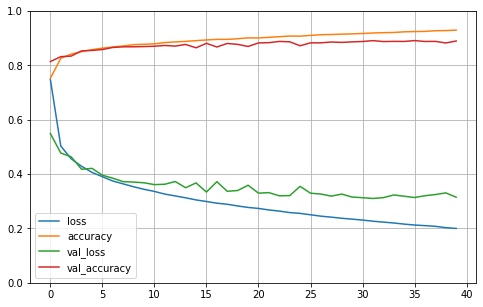

In [28]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [31]:
# Evalute on test set 
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8801


[0.34460902214050293, 0.8801000118255615]

In [33]:
model.predict_proba(X_test[:5]).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.16, 0.  , 0.01, 0.  , 0.  , 0.  , 0.83, 0.  , 0.  , 0.  ]],
      dtype=float32)

Actual - Ankle boot
Prediction - Ankle boot


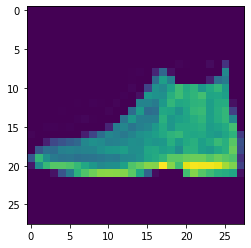

Actual - Pullover
Prediction - Pullover


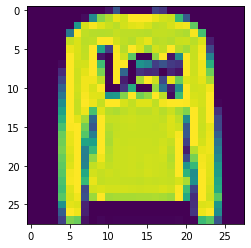

Actual - Trouser
Prediction - Trouser


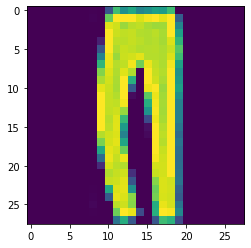

Actual - Trouser
Prediction - Trouser


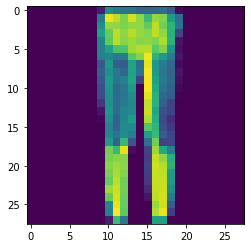

Actual - Shirt
Prediction - Shirt


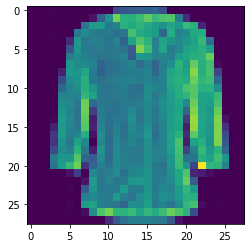

In [36]:
predictions = model.predict_classes(X_test[:5])
true_labels = y_test[:5]
for sample, pred, actual in zip(X_test[:5], predictions, true_labels):
    print(f"Actual - {class_names[actual]}\nPrediction - {class_names[pred]}")
    plt.imshow(sample)
    plt.show()
    print("="*50)